In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import seaborn as sns

In [98]:
# Assign data files
events = "athlete_events.csv"
region = "noc_regions.csv"
# Read the data
events_data = pd.read_csv(events)
region_data = pd.read_csv(region)
#events_data.head()
#region_data.head()
#Combine the data into a single DataFrame
Olympics_df = pd.merge(events_data,region_data, how ="left", on ='NOC')
Olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [99]:
olympics_fdf = Olympics_df[['ID', 'Name', 'Sex', 'Age','Height','Weight','Team','Games','Year','Season','City','Sport','Medal','region']]
olympics_fdf

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,NaN,Poland


In [100]:
olympics_age=olympics_fdf[olympics_fdf["Age"] !='N/A']
olympics_age.head()


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands


In [101]:
olympics_age.to_csv('olympic_merged.csv')

In [102]:
olympics_age

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,NaN,Poland


In [108]:
#data check for clensing 
na_values=olympics_age.isna()
na_columns=na_values.any()
coulums_with_na1= olympics_age.columns[na_columns].tolist()
print(coulums_with_na1)



['Height', 'Weight', 'region']


In [104]:
olympics_age1=olympics_age

In [109]:
#change age to int and set age of null records to mode value for calculation 
olympics_age['Age'] =olympics_age['Age'].fillna(0)
#olympics_age.Medal=olympics_age.fillna('None')
olympics_age.Age=olympics_age.Age.astype(int)


In [110]:
na_values=olympics_age.isna()
na_columns=na_values.any()
coulums_with_na= olympics_age.columns[na_columns].tolist()
print(coulums_with_na)


['Height', 'Weight', 'region']


In [111]:
olympics_age.Medal =olympics_age.Medal.fillna('No Medal')

In [112]:
#List events with higest medal 
High_sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(5)
High_sport

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

In [113]:
Popular_Sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(1)
Popular_Sport

Athletics    38624
Name: Sport, dtype: int64

In [114]:
##List events with Least medal 
Low_sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(5)
Low_sport

Aeronautics       1
Basque Pelota     2
Roque             4
Jeu De Paume     11
Racquets         12
Name: Sport, dtype: int64

In [115]:
Uncommon_Sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(1)
Uncommon_Sport

Aeronautics    1
Name: Sport, dtype: int64

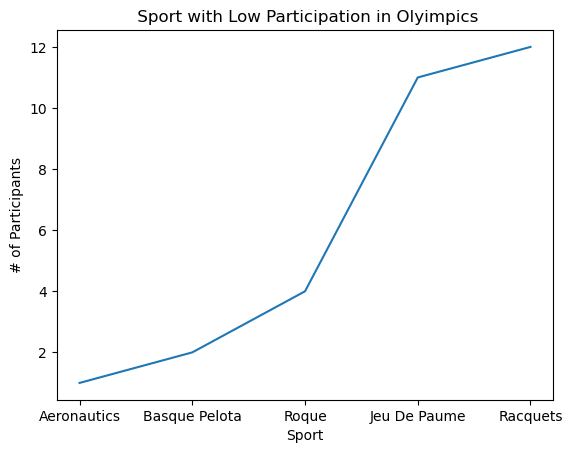

In [155]:
plt.plot(Low_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Low Participation in Olyimpics')
plt.show
plt.savefig("Low_Participation.png")


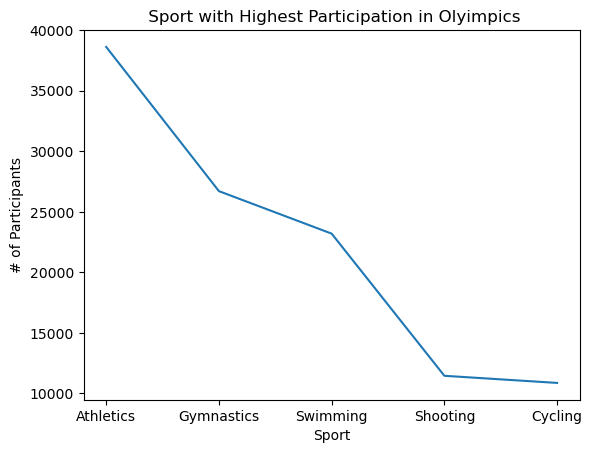

In [154]:
plt.plot(High_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Highest Participation in Olyimpics')
plt.show
plt.savefig("High_Participation.png")

In [132]:
#Total sport 
olympics_sport=olympics_age.groupby('Sport')
olympics_sport_count=len(olympics_sport)
olympics_sport_count

66

In [133]:
olympics_sport.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,No Medal,China
1,2,A Lamusi,M,23,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144851,72692,Neville Stephen Bulwer-Lytton,M,29,NaN,NaN,Great Britain,1908 Summer,1908,Summer,London,Jeu De Paume,Bronze,UK
158944,79794,Eustace Hamilton Miles,M,39,NaN,NaN,Great Britain,1908 Summer,1908,Summer,London,Jeu De Paume,Silver,UK
214105,107506,Hermann Schreiber,M,26,NaN,NaN,Switzerland,1936 Summer,1936,Summer,Berlin,Aeronautics,Gold,Switzerland
230588,115733,Smith O. Streeter,M,59,NaN,NaN,United States,1904 Summer,1904,Summer,St. Louis,Roque,Silver,USA


In [134]:
olympics_sport_year=olympics_age.groupby('Year')
olympics_sport_year_count=len(olympics_sport_year)
olympics_sport_year_count


35

In [135]:
olympics_sport_year.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,No Medal,China
1,2,A Lamusi,M,23,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,1724,Aristidis Akratopoulos,M,0,NaN,NaN,Greece,1896 Summer,1896,Summer,Athina,Tennis,No Medal,Greece
3080,1724,Aristidis Akratopoulos,M,0,NaN,NaN,Greece-3,1896 Summer,1896,Summer,Athina,Tennis,No Medal,Greece
3081,1725,"Konstantinos ""Kostas"" Akratopoulos",M,0,NaN,NaN,Greece,1896 Summer,1896,Summer,Athina,Tennis,No Medal,Greece
3082,1725,"Konstantinos ""Kostas"" Akratopoulos",M,0,NaN,NaN,Greece-3,1896 Summer,1896,Summer,Athina,Tennis,No Medal,Greece


In [136]:
winter_olympic = olympics_age[olympics_age.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
winter_olympic


Number of Sports Played In Winter Olympics: 17


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,No Medal,Netherlands
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,No Medal,Netherlands
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,No Medal,Poland
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,No Medal,Poland
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,No Medal,Poland
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,No Medal,Poland


In [137]:
Summer_olympic = olympics_age[olympics_age.Season=='Summer']
Summer_sports = len(Summer_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
Summer_olympic

Number of Sports Played In Summer Olympics: 52


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,No Medal,China
1,2,A Lamusi,M,23,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168.0,NaN,Netherlands,1932 Summer,1932,Summer,Los Angeles,Athletics,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27,168.0,76.0,Argentina,2004 Summer,2004,Summer,Athina,Hockey,No Medal,Argentina
271107,135566,"James Francis ""Jim"" Zylker",M,21,175.0,75.0,United States,1972 Summer,1972,Summer,Munich,Football,No Medal,USA
271108,135567,Aleksandr Viktorovich Zyuzin,M,24,183.0,72.0,Russia,2000 Summer,2000,Summer,Sydney,Rowing,No Medal,Russia
271109,135567,Aleksandr Viktorovich Zyuzin,M,28,183.0,72.0,Russia,2004 Summer,2004,Summer,Athina,Rowing,No Medal,Russia


In [138]:
agg_max=olympics_age.groupby('Sport').Age.agg(['max'])
agg_min=olympics_age.groupby('Sport').Age.agg(['min'])
agg_avg=olympics_age.groupby('Sport').Age.agg(['mean'])
agg=olympics_age.groupby('Sport').Age.agg(['mean','max','min'])
agg

,mean,max,min
Sport,,,
Aeronautics,26.000000,26,26
Alpine Skiing,23.000453,55,0
Alpinism,24.840000,57,0
Archery,26.977721,71,0
Art Competitions,39.396870,97,0
...,...,...,...
Tug-Of-War,21.723529,45,0
Volleyball,25.117215,41,0
Water Polo,24.325273,45,0


In [139]:
Top_Sport=['Athletics','Gymnastics','Swimming','Shooting','Cycling']
Bottom_Sport=['Aeronautics','Basque Pelota','Roque','Jeu De Paume','Racquets']
data_top = olympics_age[olympics_age["Sport"].isin(Top_Sport)]
data_Bottom=olympics_age[olympics_age["Sport"].isin(Bottom_Sport)]


In [163]:
#too Much to display in one graph
#bar_plot = olympics_age['Sport'].value_counts().plot.bar(width=0.7, zorder=3)
#bar_plot.set_xlabel("Sport")
#bar_plot.set_ylabel("# of Participants")
#plt.show()

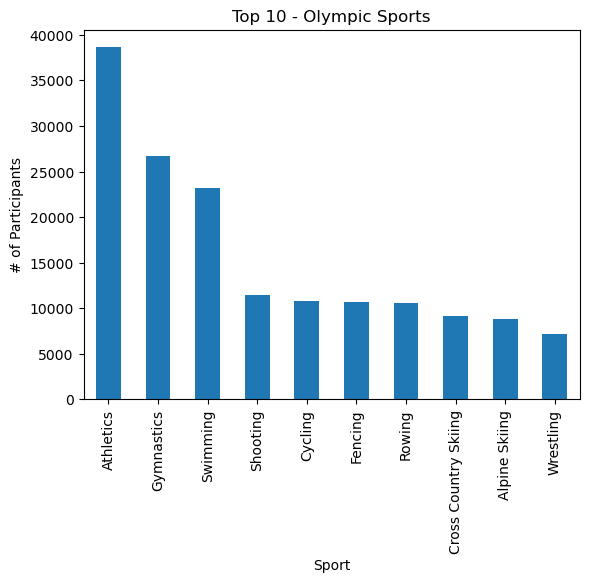

<Figure size 640x480 with 0 Axes>

In [159]:
top_sport=olympics_age['Sport'].value_counts().sort_values(ascending=False)[:1]
bottom_sport=olympics_age['Sport'].value_counts().sort_values(ascending=True)[:1]
olympics_age['Sport'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Top 10 - Olympic Sports')
plt.ylabel('# of Participants')
plt.xlabel('Sport')
plt.show()
plt.savefig("Top_10_Sports.png")

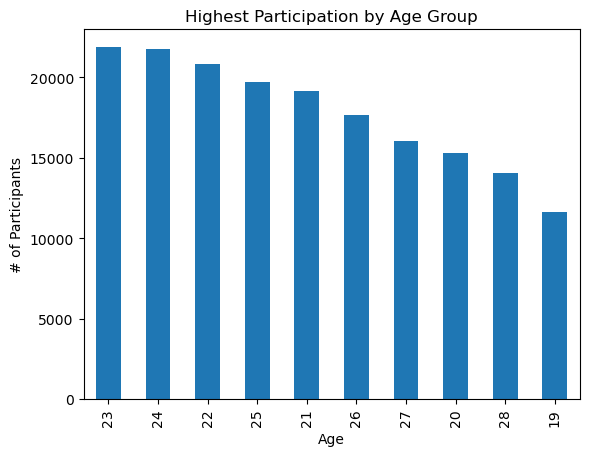

<Figure size 640x480 with 0 Axes>

In [160]:
#olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')

olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.show()
plt.savefig("Highest_Participation_by_Age.png")

In [91]:
#Summary 
# replace 0 age group with Mean Age 
olympics_age1.replace(to_replace = 0, value = olympics_age1.mean(), inplace=True)
max_age= olympics_age1['Age'].max()
min_age= olympics_age1['Age'].min()
Sport_mean = olympics_age1['Age'].mean()


------------------------------------------------------------
The Most Popular sport in the Olympics has 38624 Participants 
The uncommon sport in the Olympics has 1 Participant
Top Sports are ['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling'] 
Most Uncommon Sports are ['Aeronautics', 'Basque Pelota', 'Roque', 'Jeu De Paume', 'Racquets']
The Oldest Participant is of Age 97.0
The Youngest Participant is of Age 10.0
The Average Age of Participants is 25.525690452692192
------------------------------------------------------------


C:\Users\anush\AppData\Local\Temp\ipykernel_3136\809547651.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  olympics_age1.replace(to_replace = 0, value = olympics_age1.mean(), inplace=True)


In [161]:

print(f"------------------------------------------------------------")
print(f"Dataset has data for {olympics_sport_year_count} Years ")
print(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants ")
print(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant")
print(f"Top Sports are {Top_Sport} ")
print(f"Most Uncommon Sports are {Bottom_Sport}")
print(f"The Oldest Participant is of Age {max_age}")
print(f"The Youngest Participant is of Age {min_age}")
print(f"The Average Age of Participants is {Sport_mean}")
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
print(f"Total # of Olympic Sport is: {olympics_sport_count}")
    # print(f"Values above {upper_bound} could be {drug} outliers.")
print(f"------------------------------------------------------------")


------------------------------------------------------------
Dataset has data for 35 Years 
The Most Popular sport in the Olympics has 38624 Participants 
The uncommon sport in the Olympics has 1 Participant
Top Sports are ['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling'] 
Most Uncommon Sports are ['Aeronautics', 'Basque Pelota', 'Roque', 'Jeu De Paume', 'Racquets']
The Oldest Participant is of Age 97.0
The Youngest Participant is of Age 10.0
The Average Age of Participants is 25.525690452692192
Number of Sports Played In Summer Olympics: 52
Number of Sports Played In Winter Olympics: 17
Total # of Olympic Sport is: 66
------------------------------------------------------------


In [165]:
with open("Analysis_file", "w") as outfile:   
 
    outfile.write("Olympics Data Analayis of Sport and Age after replacing Null age with the Mean Age of participants\n")
    outfile.write(f"------------------------------------------------------------\n")
    outfile.write(f"Dataset analysed has data for {olympics_sport_year_count} Years\n")
    outfile.write(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants\n")
    outfile.write(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant\n")
    outfile.write(f"Top Sports are {Top_Sport}\n")
    outfile.write(f"Most Uncommon Sports are {Bottom_Sport}\n")
    outfile.write(f"The Oldest Participant is of Age {max_age}\n")
    outfile.write(f"The Youngest Participant is of Age {min_age}\n")
    outfile.write(f"The Average Age of Participants is {Sport_mean}\n")
    outfile.write(f"Number of Sports Played In Summer Olympics: {Summer_sports}\n")
    outfile.write(f"Number of Sports Played In Winter Olympics: {winter_sports}\n")
    outfile.write(f"Total # of Olympic Sport is: {olympics_sport_count}\n")
    outfile.write(f"------------------------------------------------------------\n")
    